<b>¡Hola Jorge!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [3]:
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
  ordenes = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
productos = pd.read_csv('/datasets/products.csv', sep=";")
pasillos = pd.read_csv('/datasets/aisles.csv', sep=";")
departamentos = pd.read_csv('/datasets/departments.csv', sep=";")
orden_de_productos = pd.read_csv('/datasets/order_products.csv', sep=";")


In [5]:
ordenes.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has leído los archivos correctamente utilizando `pd.read_csv()`, y es positivo que hayas utilizado el parámetro `sep=";"` para delimitar los datos, lo cual es crucial para evitar errores en la carga. Además, el uso de `.info()` es una excelente elección para revisar la estructura y tipos de datos.</div>

In [6]:
productos.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
pasillos.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
departamentos.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [9]:
orden_de_productos.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Mediante el primer analisis de los datos se puede detectar varios detalles acerca de como estan compuestas las tablas. 
1."Lo que primero pude detectar es que hay valores ausenten en algunas columnas"
2."El tipo de datos que contienen algunas columnas de tipo categorias estan en tipo int64 "
3."Se tuvo que delimitar correctamente las tablas con ; para poder leer la informacion correctamente"

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has detectado correctamente que existen valores ausentes y algunas columnas categóricas que están almacenadas como `int64`. Además, mencionas que el delimitador `;` fue necesario, lo que demuestra que comprendiste las peculiaridades de los datos.</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2.
"1) Detectar todos los valores ausentes y duplicados con los metodos isna() y duplicated()."
"2) Analizar detalladamente la razon por la cual estos valores estan dupliados o ausentes para no borrar informacion valiosa"
"3) Teniendo ya las razones de de la falta de datos podremos tomar una descision para saber que hacer con ellos"

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [10]:
# Revisa si hay pedidos duplicados
ordenes[ordenes.duplicated()]



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [11]:
ordenes.duplicated().sum()

15

<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Al manejar los duplicados, notaste que varias órdenes estaban repetidas y todas se realizaron en miércoles a las 2 a.m. Aunque eliminaste las filas duplicadas, podrías haber explorado más la razón de este comportamiento, tal vez filtrando por IDs de usuario o verificando si es un patrón de compras automáticas. Esto podría dar lugar a un análisis interesante sobre el comportamiento del cliente en horas de la madrugada.</div>

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si, hay lineas duplicadas todas tienen en comun que se hicieron el miercoles a las 2 de la mañana. 

In [12]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
ordenes[(ordenes["order_dow"]== 3) & (ordenes["order_hour_of_day"]== 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [13]:
(15/121)*100

12.396694214876034

¿Qué sugiere este resultado?
Esto nos indica que solo el 12% de las ordenes realizadas  el miercoles a las 2 am . 

In [14]:
# Elimina los pedidos duplicados
ordenes= ordenes.drop_duplicates().reset_index(drop=True)

In [15]:
# Vuelve a verificar si hay filas duplicadas
ordenes.duplicated().sum()


0

In [16]:
# Vuelve a verificar si hay IDs duplicados de pedidos
ordenes.duplicated(subset="order_id").sum()

0

Mediante la limpieza de datos pude encontar que algunos valores se encontraban repetidos, analizando los valores repetidos detecte que estos datos eran de un mismo dia de la semana y misma hora de compra, esto me llevo a buscar entre todas las compras hechas ese dia y hora, descubirendo asi que solo el 12% de las compras hechas estaban repetidas. 

### `products` data frame

In [17]:
# Verifica si hay filas totalmente duplicadas
productos.info()
print()
productos.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



0

In [18]:
# Verifica si hay IDs duplicadas de productos
productos.duplicated(subset="product_id").sum()

0

In [19]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
productos["product_name"]= productos["product_name"].str.upper()
productos.duplicated(subset="product_name").sum()

1361

In [20]:
# Revisa si hay nombres duplicados de productos no faltantes
productos[(productos.duplicated(subset="product_name"))& (~productos["product_name"].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Analizando los datos de la tabla productos pude encontrar que no habian productos duplicados a simple vista, se tuvo que convertir los nombres de los productos a mayusculas para encontrar los valures duplicados implicitos, analizando estos duplicados encontramos que cada uno tenia productos_id diferentes, en conclusion no son productos duplicados.  


### `departments` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
departamentos.info()
departamentos.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


0

In [22]:
# Revisa si hay IDs duplicadas de productos
departamentos.duplicated(subset="department_id").sum()

0

No hay valores duplicados en esta tabla. 

### `aisles` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
pasillos.info()
pasillos.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


0

In [24]:
# Revisa si hay IDs duplicadas de productos
print(pasillos.head())
pasillos.duplicated(subset="aisle_id").sum()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


0

No se encontro datos duplicados. 

### `order_products` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
orden_de_productos.info()
orden_de_productos.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


0

In [26]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
orden_de_productos.duplicated(subset=["order_id", 'product_id']).sum()

0

No hay datos duplicados

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
# Encuentra los valores ausentes en la columna 'product_name'
productos[productos["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Analizando la tabla de productos se encontro que hay una cantidad de 1,258 valores ausentes.

In [28]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos[(productos["product_name"].isna())& (productos["aisle_id"]!= 100)]


,product_id,product_name,aisle_id,department_id


Si, todos los nombres de productos ausentes vienen del paillo numero 100.

In [29]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos[(productos["product_name"].isna())& (productos["department_id"]!=21)]


,product_id,product_name,aisle_id,department_id


Si, todos los nombres de productos ausentes vienen del departamento 21.

In [30]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
departamentos[departamentos["department_id"]== 21]


,department_id,department
20,21,missing


In [31]:
pasillos[pasillos["aisle_id"]==100]

,aisle_id,aisle
99,100,missing


Al revisar las dos tablas encontramos que tanto el pasillo 100 y el departamento 21 no cuentan con datos. 

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
productos["product_name"]= productos["product_name"].fillna("Unknown")

In [33]:
productos["product_name"].isna().sum()

0

Investigando los valores ausentes en el pasillo 100 y departamento 21 encontre que la informacion de estos dos era nula debido a esto se completo los nombres de los valores ausentes por desconocido para de esta manera no afectar a la investigacion. 
Mediante el metodo fillna() se sustituyo los valores NaN.

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has abordado correctamente los valores ausentes en el DataFrame de productos. La decisión de rellenar los nombres de productos faltantes con "Unknown" es una solución práctica para evitar la eliminación de filas. Además, es positivo que hayas identificado que todos pertenecen al departamento y pasillo "missing", lo que valida que esos productos carecían de información.</div>

### `orders` data frame

In [34]:
ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [35]:
# Encuentra los valores ausentes
ordenes.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [36]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
ordenes[ordenes["order_number"]== 1]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


Al analizar los datos de la tabla ordenes encontramos 28,817 valores ausentes de los cuales todos pertenecian al primer pedidio del cliente.
Tuve que filtrar los datos de el primer pedido del cliente para saber si los valores ausentes se debian a que el cliente era nuevo. 

### `order_products` data frame

In [37]:
# Encuentra los valores ausentes
orden_de_productos.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [38]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

minimo = orden_de_productos["add_to_cart_order"].min()
maximo = orden_de_productos["add_to_cart_order"].max()
print(minimo)
print(maximo)

1.0
64.0


Investigando acerca de los valores ausentes en la tabla de orden de productos se encontro que solo la columna de del orden en que se agregaron al carrito tenia valores ausentes. 

In [39]:
orden_de_productos[orden_de_productos["add_to_cart_order"].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [40]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ausentes = orden_de_productos[orden_de_productos["add_to_cart_order"].isna()]["order_id"]
print(ausentes)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [41]:
orden_de_productos[orden_de_productos["order_id"].isin(ausentes)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [42]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orden_de_productos[orden_de_productos["order_id"].isin(ausentes)].groupby("order_id")["product_id"].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [43]:
orden_de_productos[orden_de_productos["order_id"].isin(ausentes)].groupby("order_id")["add_to_cart_order"].min()


order_id
9310       1.0
61355      1.0
102236     1.0
129627     1.0
165801     1.0
          ... 
2999801    1.0
3125735    1.0
3308010    1.0
3347453    1.0
3383594    1.0
Name: add_to_cart_order, Length: 70, dtype: float64

Se encontro que el conteo para agregar productos al carrito se detuvo en 64.

In [44]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
orden_de_productos["add_to_cart_order"] = orden_de_productos["add_to_cart_order"].fillna(999).astype(int)

In [45]:
orden_de_productos.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Analizando los valores ausentes se pudo encontrar que al momento de agregar mas de 64 productos al carrito de compra el conteo se detenia y se perdia la cuenta. 

## Conclusiones

El procesamiento de datos es un elemento que nos facilita la transformación de datos sin procesar en información valiosa y provechosa para la toma de decisiones. 
Mediante los métodos que se emplearon en el proyecto tales como la filtración, agrupación es posible obtener patrones que ayuden a la mejor comprensión de su entorno y en la optimización de operaciones.



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [46]:
ordenes["order_dow"].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [47]:
ordenes["order_hour_of_day"].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Buen trabajo verificando que los valores en las columnas 'order_hour_of_day' y 'order_dow' están dentro de los rangos esperados. Esto asegura la consistencia de los datos antes de continuar con el análisis.</div>

Todos los valores encontrados en las columnas ocilan entre el rago de horas y dias.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [48]:
compras_hora= ordenes["order_hour_of_day"].value_counts().sort_index()

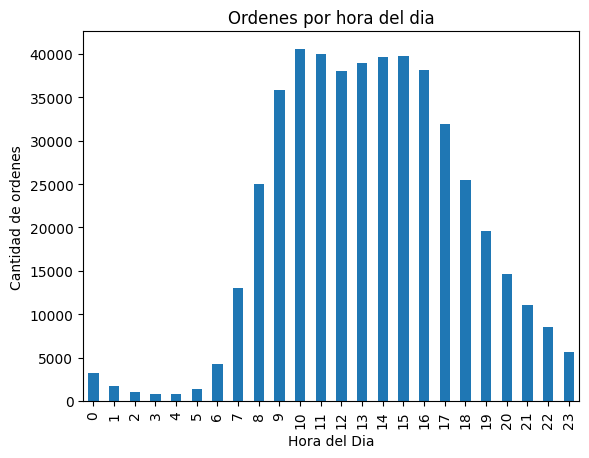

In [49]:
compras_hora.plot(kind="bar", title= "Ordenes por hora del dia", xlabel= "Hora del Dia", ylabel= "Cantidad de ordenes")
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has generado correctamente el gráfico que muestra el número de pedidos por hora del día. Este tipo de visualización es útil para identificar patrones en los hábitos de compra de los clientes, y el gráfico es claro y fácil de interpretar.</div>
5.3 A3: Gráfico de pedidos por día de la sem

Se puede encontar que las principales horas del dia donde los clientes hacen compras son desde las 8 de la mañana a las 6 de la tarde.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [50]:
compras_semana= ordenes["order_dow"].value_counts().sort_index()

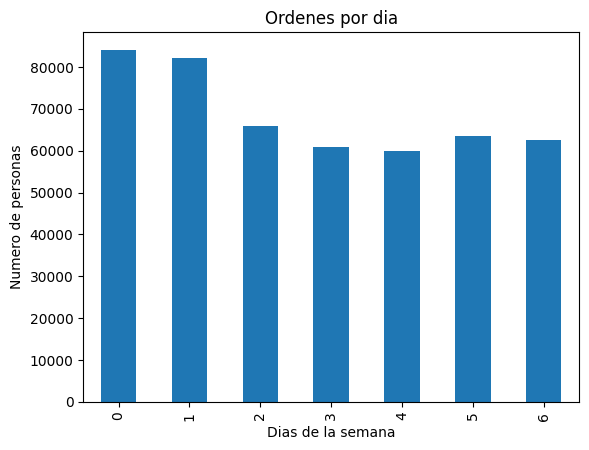

In [51]:
compras_semana.plot(kind= "bar", xlabel= "Dias de la semana", ylabel= "Numero de personas", title= "Ordenes por dia")
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El gráfico de pedidos por día de la semana está bien ejecutado. Has encontrado correctamente que los días más comunes para hacer compras son domingo y lunes, lo cual es información valiosa para entender los picos de demanda.</div>

Encontramos que las personas compran viveres en mayor cantidad para toda la semana es decir domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [52]:
dia_de_espera_ordenes= ordenes["days_since_prior_order"].value_counts().sort_index()

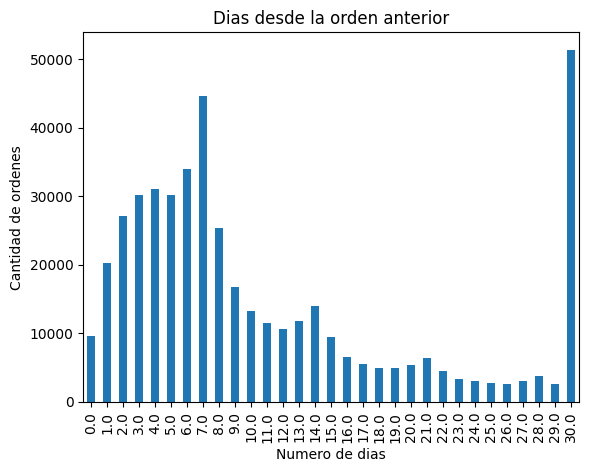

In [53]:
dia_de_espera_ordenes.plot(kind="bar", title= "Dias desde la orden anterior", xlabel= "Numero de dias", ylabel= "Cantidad de ordenes")
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has implementado correctamente los gráficos para la distribución de las compras por hora, día de la semana y días desde la última compra. El gráfico que muestra la distribución de los días desde la última compra resalta claramente que los clientes suelen comprar con frecuencia entre 0 y 10 días, lo cual es una información valiosa.</div>

Entre 0 y 10 dias de espera son donde mas ordenes se generan en total. 
Ademas encontramos que la espera de numero de dias con mas ordenes es 30, es decir que hacen compras una vez al mes. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [54]:
datos_filtrados = ordenes[ ordenes['order_dow'].isin([3, 6])]
print(datos_filtrados.reset_index(drop=True))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        2511640   148233            40          3                  8   
2         102585   191558            18          6                 16   
3        2843219    74699             4          6                 11   
4        3109465    55090            19          3                 15   
...          ...      ...           ...        ...                ...   
123541    984024    47076             2          6                 21   
123542    640934    27104             9          3                 10   
123543   3006133    34561             7          6                 10   
123544   3270802   112087             2          3                 13   
123545    216274     4391             3          3                  8   

        days_since_prior_order  
0                         30.0  
1                          2.0  
2                       

In [55]:
conteos_miercoles = datos_filtrados[datos_filtrados['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
conteos_sabado = datos_filtrados[datos_filtrados['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
print(conteos_miercoles)
print(conteos_sabado)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


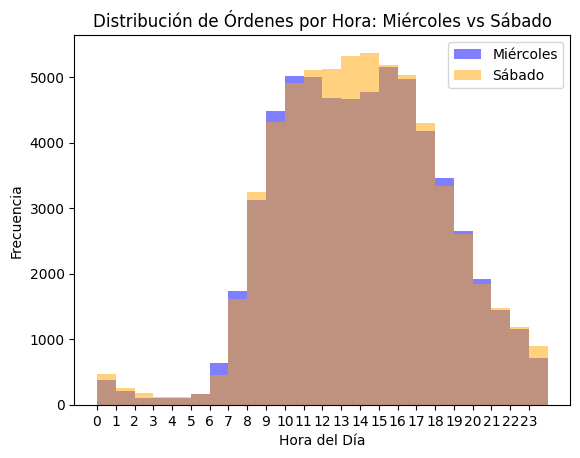

In [56]:

datos_filtrados[datos_filtrados['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5, color='blue', range=(0, 24))


datos_filtrados[datos_filtrados['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5, color='orange', range=(0, 24))


plt.title('Distribución de Órdenes por Hora: Miércoles vs Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.xticks(range(24))  
plt.legend(['Miércoles', 'Sábado'])

plt.show()


<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> El gráfico comparativo entre las órdenes de los miércoles y los sábados está bien hecho, pero podrías haber interpretado más los resultados. Por ejemplo, podrías profundizar en por qué los sábados tienen más actividad por la tarde en comparación con los miércoles, lo que podría estar relacionado con los hábitos de compra de fin de semana.</div>

Podemos notar que los dos dias de la semana tienen una distribucion similar en las ordenes por hora.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [57]:
ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [58]:
numero_pedidos_cliente = ordenes.groupby("order_number")["user_id"].count()

print(numero_pedidos_cliente)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64


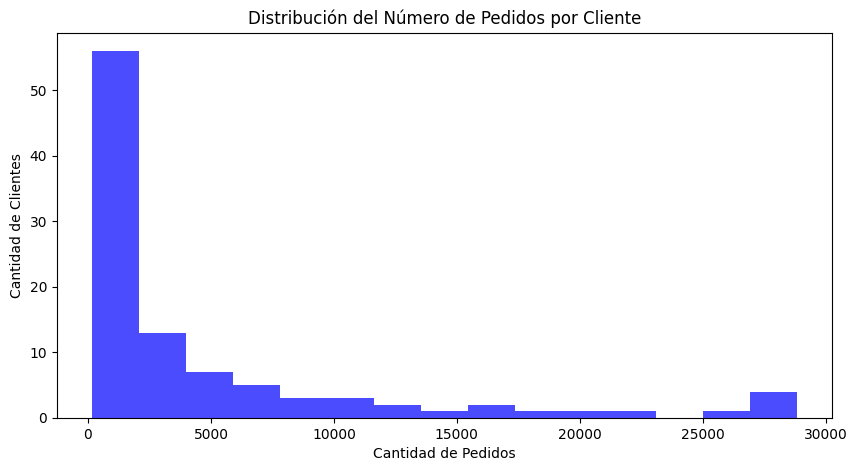

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(numero_pedidos_cliente, bins=15, color='blue', alpha=0.7)

plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Cantidad de Pedidos')
plt.ylabel('Cantidad de Clientes')
plt.show()


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La distribución del número de pedidos por cliente es clara y está bien representada gráficamente. Esta información es útil para identificar la frecuencia de compra y entender mejor el comportamiento del cliente.</div>

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [60]:
ordenen_de_productos=orden_de_productos.merge(productos, on="product_id")

In [61]:
ordenen_de_productos

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [62]:
mejores_productos= ordenen_de_productos.groupby(["product_id", "product_name"])["order_id"].count().sort_values(ascending=False)

In [63]:
mejores_20_productos= mejores_productos.head(20)
print(mejores_20_productos)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


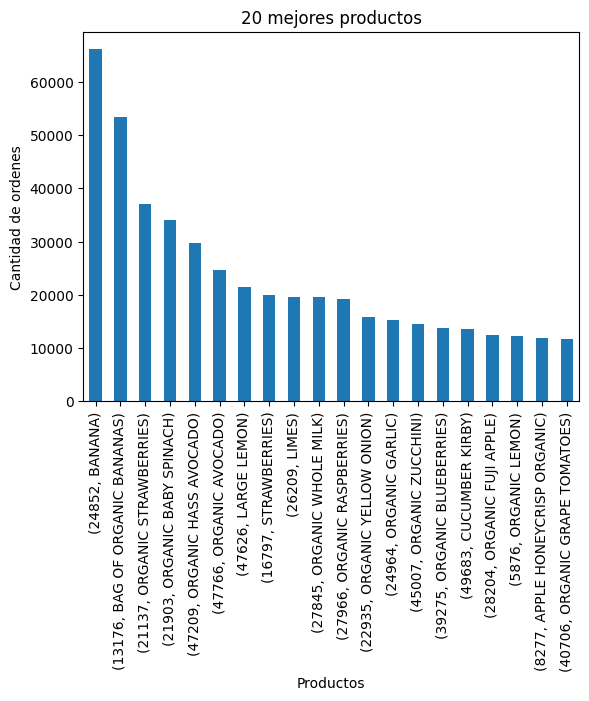

In [64]:
mejores_20_productos.plot(kind="bar", title="20 mejores productos",xlabel= "Productos", ylabel="Cantidad de ordenes")
plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Tu análisis de los 20 productos más populares es sólido. Has presentado correctamente los productos con mayor demanda, lo que proporciona información valiosa para la gestión de inventarios y decisiones de marketing.</div>

Se puede concluir que los productos con mayor numero de ventas se encuentran por arriba de las 50 mil ventas, siendo las bananas los principales productos de la compañia.  

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [65]:
productos_clientes= orden_de_productos.merge(ordenes, on="order_id")
print(productos_clientes)

         order_id  product_id  add_to_cart_order  reordered  user_id  \
0         2141543       11440                 17          0    58454   
1         2141543       31869                 15          1    58454   
2         2141543       30233                  9          1    58454   
3         2141543       27966                 20          1    58454   
4         2141543       13176                  2          1    58454   
...           ...         ...                ...        ...      ...   
4545002   1790509       43739                  1          1    60894   
4545003   1274005       38275                  1          1    32958   
4545004    812418       46149                  1          1   130466   
4545005   2666881         196                  1          1    33946   
4545006   1461911       33198                  1          1    54019   

         order_number  order_dow  order_hour_of_day  days_since_prior_order  
0                  25          0                 15      

In [66]:
articulos_por_pedido = productos_clientes.groupby('order_id')['product_id'].count().sort_values(ascending=False)
print(articulos_por_pedido)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64


In [67]:
estadisticas = articulos_por_pedido.describe()
print(estadisticas)

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El análisis del número de artículos por pedido está bien ejecutado, y los resultados son interesantes. Has señalado correctamente que la media es de 10.1 artículos por pedido, lo que es un dato valioso para entender el tamaño promedio de las compras.</div>

En términos generales, los pedidos suelen incluir alrededor de 10.1 artículos.Esto indica que es común que los clientes adquieran una cantidad moderada de productos en cada compra. La desviación estándar es 7.54, lo que señala que existe una variabilidad significativa en la cantidad de artículos adquiridos. Esto implica que algunos pedidos contienen una cantidad mayor de artículos que otros.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [68]:
productos_reordenados= ordenen_de_productos[ordenen_de_productos["reordered"]== 1].groupby(["product_id", "product_name"])["order_id"].count().sort_values(ascending=False)

In [69]:
mejores_20_productos_reordenados= productos_reordenados.head(20)

In [70]:
print(mejores_20_productos_reordenados)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64


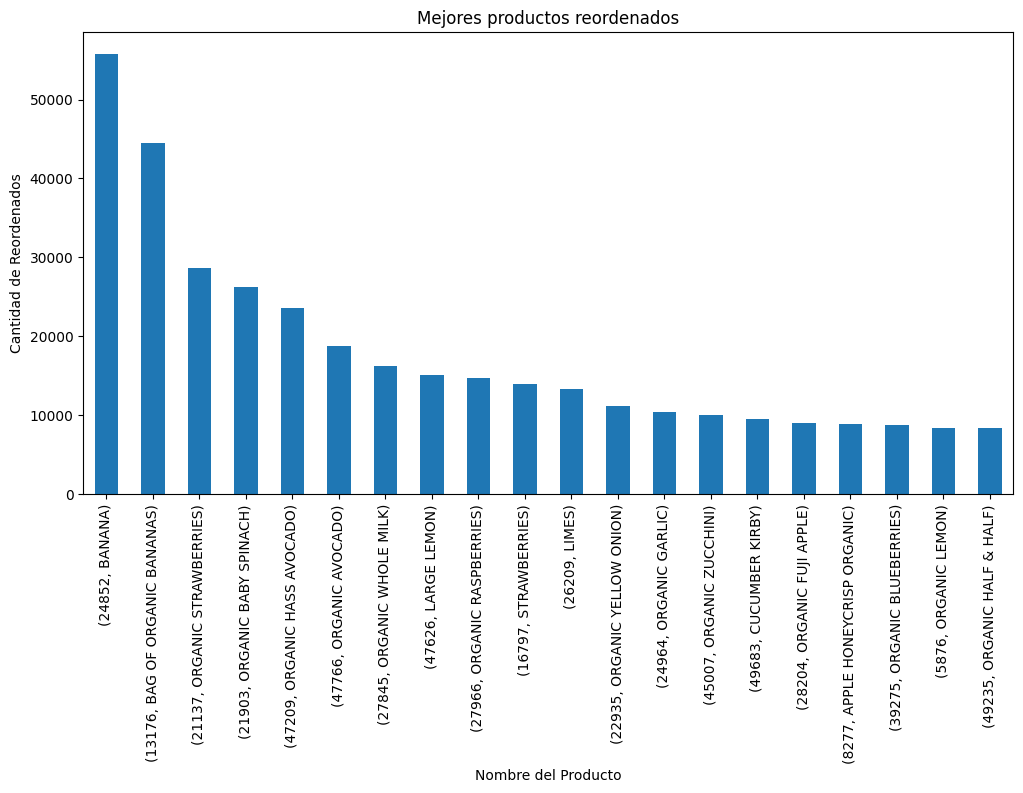

In [71]:
ax=mejores_20_productos_reordenados.plot(kind= "bar",title="Mejores productos reordenados", xlabel='Nombre del Producto', ylabel='Cantidad de Reordenados',figsize=(12, 6))

plt.show()

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Tu análisis de los productos más reordenados es excelente. Has identificado correctamente que los productos frescos y orgánicos son los más reordenados, lo que es útil para entender las preferencias del cliente.</div>

La lista señala que los compradores se están inclinando hacia artículos frescos y saludables, en especial los que son de origen orgánico. Entender estas preferencias puede asistir en la optimización de las decisiones de stock y las estrategias de marketing.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [72]:
ordenen_de_productos.groupby(["product_id", "product_name"])["reordered"].mean()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El cálculo de la tasa de repetición por producto está bien ejecutado y es relevante para entender la lealtad de los clientes hacia ciertos productos. Esto puede ser valioso para ajustar las estrategias de inventario y promociones.</div>

Los artículos que tienen una proporción elevada de reordenados pueden requerir una cantidad mayor de suministro, en contraste, los que tienen una proporción baja podrían ser seleccionados para campañas de marketing o promociones con el fin de incrementar sus ventas y visibilidad.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [73]:
ordenes_productos=ordenes.merge(orden_de_productos, on="order_id")

In [74]:
ordenes_productos.groupby("user_id")['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

El análisis de la proporción de artículos reordenados por cada comprador reveló diferencias significativas en los patrones de compra. Algunos clientes como user_id 7 muestran una alta lealtad y vuelven a pedir casi todos los productos comprados, lo que indica satisfacción y preferencia por ciertos artículos. Por el contrario, otros clientes (como user_id 4) aún no han vuelto a pedir un artículo, lo que puede indicar que están explorando nuevas opciones o aún no han encontrado un producto que les convenza.

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Tu análisis sobre la tasa de repetición por cliente es muy interesante. Al resaltar las diferencias en el comportamiento de repetición de compras entre los clientes, proporcionas una base para segmentar mejor a los consumidores según su lealtad.</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [75]:
productos_clientes.merge(productos, on="product_id")

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2141543,11440,17,0,58454,25,0,15,8.0,CHICKEN BREAST TENDERS BREADED,129,1
1,1918689,11440,14,1,131726,31,0,8,7.0,CHICKEN BREAST TENDERS BREADED,129,1
2,2151362,11440,46,0,144911,11,1,11,30.0,CHICKEN BREAST TENDERS BREADED,129,1
3,2267548,11440,9,0,69316,1,5,10,NaN,CHICKEN BREAST TENDERS BREADED,129,1
4,2591997,11440,3,1,136590,45,4,7,4.0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4545002,1176629,170,1,0,72889,92,4,9,1.0,SINGLE HERBS GINKGO LEAF DIETARY SUPPLEMENT,47,11
4545003,3139402,30458,1,0,196661,4,5,14,24.0,REGULAR MOUTH LIDS WITH BANDS,10,17
4545004,1859901,10363,1,0,39917,14,1,20,15.0,100% RAW COCONUT DRINK,98,7
4545005,1021500,25973,1,1,160507,3,3,9,2.0,ASSORTMENT BITTERSWEET CHOCOLATE BOX,45,19


In [76]:
principales_articulos= productos_clientes[productos_clientes["add_to_cart_order"]== 1].groupby("product_id")["order_id"].count().sort_values(ascending=False)

In [77]:
principales_articulos.head(20)

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: order_id, dtype: int64

In [78]:
principales_articulos = principales_articulos.reset_index()

In [79]:
principales_articulos = principales_articulos.merge(productos[['product_id', 'product_name']], on='product_id')


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La identificación de los productos que suelen ser los primeros en añadirse al carrito es una excelente adición a tu análisis. Esta información puede ser valiosa para diseñar estrategias de promoción y aumentar la visibilidad de estos productos en la plataforma.</div>

In [80]:
principales_articulos

,product_id,order_id,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
...,...,...,...
26755,10981,1,CLOUD WHITE DECORATING CUPCAKE ICING
26756,10985,1,PREMIUM TWIN PACK ROCK CORNISH GAME HEN
26757,38272,1,ORGANIC RAW COCONUT FLOUR
26758,10989,1,GARBAGE DISPOSAL FRESHENER & CLEANER RED PEAR ...


Esta lista de verificación le permite identificar qué productos son más atractivos para sus clientes al principio de su experiencia de compra, lo cual es valioso para ajustar su estrategia de marketing y aumentar la visibilidad de estos productos.
Promocionar sus productos más populares puede aumentar las ventas y mejorar la satisfacción del cliente al facilitar la adquisición de artículos que ya tienen una gran demanda.

### Conclusion general del proyecto:

Aprendí la importancia de la limpieza de datos como primer paso fundamental en cualquier proyecto de análisis. Este proceso implica no sólo eliminar los valores faltantes y corregir errores, sino también comprender la estructura del material y cómo afecta a análisis posteriores.
Cada pregunta que respondo me obliga a pensar en el significado de los datos y cómo se relacionan con el comportamiento del consumidor. Este ejercicio de pensamiento crítico me ayudó a desarrollar el pensamiento analítico que es fundamental en la ciencia de datos.

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Tu conclusión es clara y resalta los puntos clave de tu análisis. Has logrado identificar patrones en los datos, como los tiempos en los que los clientes hacen más pedidos, lo que muestra una buena comprensión del comportamiento del consumidor a partir de los datos procesados.</div>

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> ¡Felicitaciones, Jorge! Has realizado un excelente trabajo en el preprocesamiento y análisis de los datos de Instacart. Tu capacidad para limpiar los datos, manejarlos adecuadamente y generar análisis gráficos demuestra un buen nivel de dominio en ciencia de datos. ¡Sigue así!</div>